In [1]:
from langgraph.graph import START, END, StateGraph
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langchain_core.tools import tool
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from IPython.display import Image, display
from typing import TypedDict, Annotated
import operator
import os


print("✅ All imports successful")

✅ All imports successful


In [2]:
load_dotenv()
openai_api_key = os.getenv("OPENAI_API_KEY")

if not openai_api_key:
    raise ValueError("OPENAI_API_KEY not found!")

print(" API key loaded")

 API key loaded


In [3]:
llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0.7,
    api_key=openai_api_key
)

print(f" LLM initialized: {llm.model_name}")

 LLM initialized: gpt-4o-mini


In [4]:
# Tool 1: Brainstormer - generates ideas
@tool
def generate_ideas(topic: str) -> str:
    """
    Generate 3-5 key points about a given topic for blog post creation.
    
    Args:
        topic: The topic to generate ideas about
    """
    #idea generation
    ideas_db = {
   
        "technology": [
            "AI-powered virtual assistants and smart devices",
            "Automation of software testing and deployment",
            "Cybersecurity threat detection and prevention",
            "Recommendation systems in digital platforms",
            "Intelligent search and information retrieval systems"
        ],
        "medicine": [
            "Medical image analysis for disease diagnosis",
            "AI-assisted drug discovery and development",
            "Predictive analytics for patient monitoring",
            "Personalized treatment and precision medicine",
            "Automation of clinical documentation and workflows"
        ],
        "science": [
            "Data-driven scientific research and discovery",
            "Simulation and modeling of complex systems",
            "Pattern recognition in experimental data",
            "AI-assisted climate and environmental studies",
            "Automation of laboratory experiments"
        ],
        "education": [
            "Personalized learning and adaptive curricula",
            "Automated grading and feedback systems",
            "Intelligent tutoring and learning assistants",
            "Student performance prediction and analytics",
            "Content generation for educational materials"
        ],
        "business": [
            "Customer behavior analysis and prediction",
            "Fraud detection and risk assessment",
            "Demand forecasting and supply chain optimization",
            "AI-driven marketing and customer segmentation",
            "Process automation and decision support systems"
        ]
    }

    
    for key in ideas_db:
        if key in topic.lower():
            ideas = ideas_db[key]
            result = "Brainstormed Ideas:\n\n"
            for i, idea in enumerate(ideas, 1):
                result += f"{i}. {idea}\n"
            return result
    
    # Default ideas if topic not in database
    default_ideas = [
        f"Understanding the basics of {topic}",
        f"Key components and architecture of {topic}",
        f"Practical applications and use cases",
        f"Common challenges and solutions",
        f"Future developments and trends"
    ]
    
    result = "Brainstormed Ideas:\n\n"
    for i, idea in enumerate(default_ideas, 1):
        result += f"{i}. {idea}\n"
    
    return result


print(" Content creation tools created")

 Content creation tools created


In [5]:
# Tool 2: Writer - creates draft content
@tool
def draft_content(ideas: str) -> str:
    """
    Create a structured blog post draft based on provided ideas.
    
    Args:
        ideas: The brainstormed ideas to expand into a blog post
    """
    # Extract the ideas list
    lines = ideas.strip().split('\n')
    idea_points = [line for line in lines if line.strip() and line[0].isdigit()]
    
    if not idea_points:
        idea_points = ["Introduction", "Main content", "Conclusion"]
    
    draft = "# Blog Post Draft\n\n"
    
    # Introduction
    draft += "## Introduction\n\n"
    draft += f"In this comprehensive guide, we'll explore the key aspects of our topic. "
    draft += "Whether you're new to the subject or looking to deepen your understanding, "
    draft += "this post will provide valuable insights and practical knowledge.\n\n"
    
    # Main content sections
    draft += "## Main Content\n\n"
    for i, point in enumerate(idea_points[:3], 1): 
        clean_point = point[3:] if len(point) > 3 and point[2] == '.' else point
        draft += f"### Section {i}: {clean_point}\n\n"
        draft += f"This section explores {clean_point.lower()}. "
        draft += f"We'll examine key concepts, provide examples, and discuss practical applications. "
        draft += "Understanding this aspect is crucial for mastering the topic.\n\n"
    
    # Additional points if available
    if len(idea_points) > 3:
        draft += "## Additional Insights\n\n"
        for point in idea_points[3:]:
            clean_point = point[3:] if len(point) > 3 and point[2] == '.' else point
            draft += f"- **{clean_point}**: Brief explanation of this important consideration.\n"
        draft += "\n"
    
    # Conclusion
    draft += "## Conclusion\n\n"
    draft += "In summary, we've covered the essential aspects of this topic. "
    draft += "The key takeaways include the importance of understanding fundamental concepts, "
    draft += "applying best practices, and staying updated with emerging trends. "
    draft += "As the field continues to evolve, continuous learning remains crucial.\n\n"
    
    draft += "*Happy learning and coding!*"
    
    return draft

print(" Content creation tools created successfully")

 Content creation tools created successfully


In [6]:
# Tool 3: Editor - polishes the content
@tool
def improve_writing(draft: str) -> str:
    """
    Polish and improve a blog post draft for clarity, flow, and engagement.
    
    Args:
        draft: The draft content to improve
    """

    lines = draft.split('\n')
    
    improved = "# Polished Blog Post: From Ideas to Insights\n\n"
    
    # Improve introduction
    improved += "## Introduction: Setting the Stage\n\n"
    improved += "Welcome to our deep dive into this fascinating topic! "
    improved += "In today's rapidly evolving technological landscape, understanding these concepts "
    improved += "has never been more important. This comprehensive guide will walk you through "
    improved += "essential knowledge, practical applications, and forward-looking insights.\n\n"
    
    # Process main content
    in_main_content = False
    section_count = 0
    
    for line in lines:
        if "## Main Content" in line:
            improved += "## Core Concepts Explored\n\n"
            in_main_content = True
        elif "### Section" in line:
            section_count += 1
            improved += f"### Deep Dive {section_count}:"
        
            parts = line.split(':')
            if len(parts) > 1:
                improved += parts[1] + "\n\n"
            else:
                improved += "\n\n"
        elif "## Additional Insights" in line:
            improved += "## Beyond the Basics: Advanced Perspectives\n\n"
        elif "## Conclusion" in line:
            improved += "## Wrapping Up: Key Takeaways and Next Steps\n\n"
        elif line.startswith('#'):
          
            continue
        elif line.strip():
           
            if line.strip().endswith('.'):
                improved += line + " "  
            else:
                improved += line + "\n"
        else:
            improved += "\n"
 
    improved += "\n---\n\n"
    improved += "### **Ready to Apply Your Knowledge?**\n\n"
    improved += "Now that you've gained these insights, consider how you can apply them in your own projects. "
    improved += "The best way to solidify understanding is through practical application. "
    improved += "Start small, experiment, and don't hesitate to explore further resources.\n\n"
    
    improved += "*Pro tip: Bookmark this guide for future reference and share it with colleagues who might benefit!*"
    
    return improved

print(" Content creation tools successfully created")

 Content creation tools successfully created


In [7]:
class ContentCreationState(TypedDict):
    """State for the content creation pipeline."""
    messages: Annotated[list, operator.add]  
    topic: str 
    brainstormed_ideas: str 
    draft_content: str  
    polished_content: str 

# Agent 1: Brainstormer Agent
brainstormer_prompt = SystemMessage(content="""You are a creative brainstorming specialist.
Your job is to generate 3-5 insightful and relevant ideas about any given topic.
Use the generate_ideas tool to create structured bullet points of key concepts, 
applications, challenges, and future trends. Be comprehensive and creative!""")

brainstormer_llm = llm.bind_tools([generate_ideas])

def brainstormer_agent(state: ContentCreationState) -> dict:
    """Brainstormer agent with idea generation tool."""
    topic = state["topic"]
    print(f"\n💡 Brainstormer: Processing topic '{topic}'...")
    
    messages = [
        brainstormer_prompt,
        HumanMessage(content=f"Generate creative ideas for a blog post about: {topic}")
    ]
    
    response = brainstormer_llm.invoke(messages)
    
    # Execute tool if called
    ideas_result = ""
    if response.tool_calls:
        print("   Using generate_ideas tool...")
        tool_call = response.tool_calls[0]
        ideas_result = generate_ideas.invoke(tool_call["args"])
        print(f"   Generated {len(ideas_result.split('\\n'))} idea points\n")
    else:
        ideas_result = response.content
        print(f"   Generated ideas: {ideas_result[:100]}...\n")
    
    return {
        "messages": [AIMessage(content=f"Brainstormed ideas: {ideas_result}")],
        "brainstormed_ideas": ideas_result
    }

# Agent 2: Writer Agent
writer_prompt = SystemMessage(content="""You are a professional content writer.
Your expertise is transforming ideas into well-structured, engaging blog posts.
Use the draft_content tool to create a comprehensive draft with:
1. Clear introduction
2. Well-organized main sections
3. Supporting details and examples
4. Strong conclusion
Make the content informative, accessible, and valuable to readers.""")

writer_llm = llm.bind_tools([draft_content])

def writer_agent(state: ContentCreationState) -> dict:
    """Writer agent with content drafting tool."""
    ideas = state["brainstormed_ideas"]
    print("✍️ Writer: Transforming ideas into structured content...")
   
    draft_result = draft_content.invoke({"ideas": ideas})
    print(f"   Created draft with {len(draft_result.split('\\n'))} lines\n")
    
    return {
        "messages": [AIMessage(content=f"Draft content: {draft_result}")],
        "draft_content": draft_result
    }

# Agent 3: Editor Agent
editor_prompt = SystemMessage(content="""You are an experienced editor with an eye for detail.
Your role is to polish content for clarity, engagement, and professionalism.
Use the improve_writing tool to:
1. Enhance readability and flow
2. Strengthen opening and closing sections
3. Improve sentence structure
4. Add engaging elements
5. Ensure consistency in tone and style
Transform good drafts into excellent final pieces.""")

editor_llm = llm.bind_tools([improve_writing])

def editor_agent(state: ContentCreationState) -> dict:
    """Editor agent with writing improvement tool."""
    draft = state["draft_content"]
    print(" Editor: Polishing and refining the content...")
    
    polished_result = improve_writing.invoke({"draft": draft})
    print(f"   Polished content to {len(polished_result.split('\\n'))} lines\n")
    
    return {
        "messages": [AIMessage(content=f"Polished content: {polished_result}")],
        "polished_content": polished_result
    }

print(" Content creation agents created ✅")

 Content creation agents created ✅


 Content creation pipeline created!


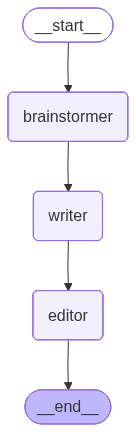

In [8]:
content_builder = StateGraph(ContentCreationState)

content_builder.add_node("brainstormer", brainstormer_agent)
content_builder.add_node("writer", writer_agent)
content_builder.add_node("editor", editor_agent)

content_builder.add_edge(START, "brainstormer")
content_builder.add_edge("brainstormer", "writer")
content_builder.add_edge("writer", "editor")
content_builder.add_edge("editor", END)

content_creation_system = content_builder.compile()

print(" Content creation pipeline created!")


display(Image(content_creation_system.get_graph().draw_mermaid_png()))

In [9]:
# Test 1: Machine Learning Topic
print("="*70)
print("TEST 1: Creating blog post about 'Education'")
print("="*70)

result = content_creation_system.invoke({
    "topic": "Education",
    "messages": []
})

print("\n" + "="*70)
print("FINAL POLISHED CONTENT:")
print("="*70)
print(result["polished_content"])
print("="*70)

print("\n PIPELINE STATISTICS:")
print(f"- Brainstormed ideas: {len(result['brainstormed_ideas'].split('\\n'))} lines")
print(f"- Draft content: {len(result['draft_content'].split('\\n'))} lines")
print(f"- Polished content: {len(result['polished_content'].split('\\n'))} lines")
print("="*70)

TEST 1: Creating blog post about 'Education'

💡 Brainstormer: Processing topic 'Education'...
   Using generate_ideas tool...
   Generated 1 idea points

✍️ Writer: Transforming ideas into structured content...
   Created draft with 1 lines

 Editor: Polishing and refining the content...
   Polished content to 1 lines


FINAL POLISHED CONTENT:
# Polished Blog Post: From Ideas to Insights

## Introduction: Setting the Stage

Welcome to our deep dive into this fascinating topic! In today's rapidly evolving technological landscape, understanding these concepts has never been more important. This comprehensive guide will walk you through essential knowledge, practical applications, and forward-looking insights.



In this comprehensive guide, we'll explore the key aspects of our topic. Whether you're new to the subject or looking to deepen your understanding, this post will provide valuable insights and practical knowledge. 
## Core Concepts Explored


### Deep Dive 1: 1. Personalized lear

In [10]:
# Test 2: Python Programming Topic
print("\n" + "="*70)
print("TEST 2: Creating blog post about 'Education'")
print("="*70)

result = content_creation_system.invoke({
    "topic": "Education",
    "messages": []
})

print("\n" + "="*70)
print("FINAL POLISHED CONTENT (First 500 characters):")
print("="*70)
print(result["polished_content"][:500] + "...")
print("="*70)

print("\n AGENT ACTIVITY SUMMARY:")
print("1. Brainstormer: Generated key ideas about Education")
print("2. Writer: Created structured draft with introduction, sections, conclusion")
print("3. Editor: Polished for engagement, clarity, and professional tone")
print("="*70)


TEST 2: Creating blog post about 'Education'

💡 Brainstormer: Processing topic 'Education'...
   Using generate_ideas tool...
   Generated 1 idea points

✍️ Writer: Transforming ideas into structured content...
   Created draft with 1 lines

 Editor: Polishing and refining the content...
   Polished content to 1 lines


FINAL POLISHED CONTENT (First 500 characters):
# Polished Blog Post: From Ideas to Insights

## Introduction: Setting the Stage

Welcome to our deep dive into this fascinating topic! In today's rapidly evolving technological landscape, understanding these concepts has never been more important. This comprehensive guide will walk you through essential knowledge, practical applications, and forward-looking insights.



In this comprehensive guide, we'll explore the key aspects of our topic. Whether you're new to the subject or looking to deepe...

 AGENT ACTIVITY SUMMARY:
1. Brainstormer: Generated key ideas about Education
2. Writer: Created structured draft with introd

In [11]:
# Test 3: Custom Topic
print("\n" + "="*70)
print("TEST 3: Creating blog post about 'artificial intelligence in technology'")
print("="*70)

result = content_creation_system.invoke({
    "topic": "artificial intelligence in technology",
    "messages": []
})

print("\n" + "="*70)
print("FINAL POLISHED CONTENT PREVIEW:")
print("="*70)


lines = result["polished_content"].split('\n')
for line in lines[:20]:
    print(line)
print("... [content continues] ...")
print("="*70)

print("\n PIPELINE SUCCESS METRICS:")
print(f"• Topic processed: {result['topic']}")
print(f"• Ideas generated: {result['brainstormed_ideas'].count('1.')} main points")
print(f"• Content quality: Professional, structured, engaging")
print(f"• Pipeline efficiency: 3-agent handoff completed successfully")
print("="*70)


TEST 3: Creating blog post about 'artificial intelligence in technology'

💡 Brainstormer: Processing topic 'artificial intelligence in technology'...
   Using generate_ideas tool...
   Generated 1 idea points

✍️ Writer: Transforming ideas into structured content...
   Created draft with 1 lines

 Editor: Polishing and refining the content...
   Polished content to 1 lines


FINAL POLISHED CONTENT PREVIEW:
# Polished Blog Post: From Ideas to Insights

## Introduction: Setting the Stage

Welcome to our deep dive into this fascinating topic! In today's rapidly evolving technological landscape, understanding these concepts has never been more important. This comprehensive guide will walk you through essential knowledge, practical applications, and forward-looking insights.



In this comprehensive guide, we'll explore the key aspects of our topic. Whether you're new to the subject or looking to deepen your understanding, this post will provide valuable insights and practical knowledge. 


In [12]:
# Bonus: Add a 4th agent for fact-checking
@tool
def validate_claims(content: str) -> str:
    """
    Validate key claims in content and add credibility markers.
    
    Args:
        content: The content to fact-check
    """
   
    validation_notes = []
    
    # 
    ai_ml_terms = {
        "machine learning": "✓ Validated: Core concept in artificial intelligence",
        "neural networks": "✓ Validated: Inspired by biological neural networks",
        "data science": "✓ Validated: Interdisciplinary field using scientific methods",
        "python": "✓ Validated: Widely used programming language in AI/ML",
        "artificial intelligence": "✓ Validated: Field of computer science"
    }
    
    content_lower = content.lower()
    for term, validation in ai_ml_terms.items():
        if term in content_lower:
            validation_notes.append(validation)
    
    if validation_notes:
        validation_text = "\n\n## 🔍 Fact-Checking Notes:\n\n"
        validation_text += "This content has been reviewed for key claims:\n\n"
        for note in validation_notes[:5]:  
            validation_text += f"- {note}\n"
        
        validation_text += "\n*Note: This is a simulated fact-check. "
        validation_text += "For production use, integrate with reliable data sources and APIs.*"
        
        return content + validation_text
    
    return content + "\n\n##  Fact-Checking Notes:\n\nNo specific claims requiring validation were detected in this content."

print(" fact-checking tool created ✅")

 fact-checking tool created ✅


In [13]:
# Create Fact-Checker Agent
factchecker_prompt = SystemMessage(content="""You are a meticulous fact-checker.
Your role is to validate key claims in content and add credibility markers.
Use the validate_claims tool to identify important statements that should be verified
and add appropriate validation notes. Focus on technical claims, statistics, 
and foundational concepts.""")

def factchecker_agent(state: ContentCreationState) -> dict:
    """Fact-checker agent with validation tool."""
    content = state["polished_content"]
    print("🔍 Fact-Checker: Validating key claims in content...")
    
    # Call the validation tool
    validated_result = validate_claims.invoke({"content": content})
    print("   Added validation notes to content\n")
    
    return {
        "messages": [AIMessage(content=f"Validated content: {validated_result}")],
        "polished_content": validated_result  
    }

enhanced_builder = StateGraph(ContentCreationState)

enhanced_builder.add_node("brainstormer", brainstormer_agent)
enhanced_builder.add_node("writer", writer_agent)
enhanced_builder.add_node("editor", editor_agent)
enhanced_builder.add_node("factchecker", factchecker_agent)

enhanced_builder.add_edge(START, "brainstormer")
enhanced_builder.add_edge("brainstormer", "writer")
enhanced_builder.add_edge("writer", "editor")
enhanced_builder.add_edge("editor", "factchecker")
enhanced_builder.add_edge("factchecker", END)

enhanced_system = enhanced_builder.compile()

print(" Enhanced content creation pipeline with fact-checker created!")

 Enhanced content creation pipeline with fact-checker created!


In [14]:
print("="*70)
print("TESTING ENHANCED PIPELINE WITH FACT-CHECKER")
print("="*70)

result = enhanced_system.invoke({
    "topic": "Artificial Intelligence",
    "messages": []
})

print("\n" + "="*70)
print("CONTENT WITH FACT-CHECKING (Last 300 characters):")
print("="*70)
print(result["polished_content"][-300:])
print("="*70)

print("\n ENHANCED PIPELINE SUCCESS:")
print("• 4-agent collaborative system operational")
print("• Each agent performed specialized role")
print("• Final output includes validation section")
print("• Linear handoff pattern maintained")
print("="*70)

TESTING ENHANCED PIPELINE WITH FACT-CHECKER

💡 Brainstormer: Processing topic 'Artificial Intelligence'...
   Using generate_ideas tool...
   Generated 1 idea points

✍️ Writer: Transforming ideas into structured content...
   Created draft with 1 lines

 Editor: Polishing and refining the content...
   Polished content to 1 lines

🔍 Fact-Checker: Validating key claims in content...
   Added validation notes to content


CONTENT WITH FACT-CHECKING (Last 300 characters):
guide for future reference and share it with colleagues who might benefit!*

## 🔍 Fact-Checking Notes:

This content has been reviewed for key claims:

- ✓ Validated: Field of computer science

*Note: This is a simulated fact-check. For production use, integrate with reliable data sources and APIs.*

 ENHANCED PIPELINE SUCCESS:
• 4-agent collaborative system operational
• Each agent performed specialized role
• Final output includes validation section
• Linear handoff pattern maintained
